<a href="https://colab.research.google.com/github/EdgaRojas/MachineLearning/blob/main/Unidad2/1_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Múltiple

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("asesinatos.csv", encoding='latin-1')

In [ ]:
df.head()

,Estado,id_area,habitantes,area_km2,ingresos_medios,edad_media_poblacion,densidad_poblacional,indice_gini,tasa_desempleo_juvenil,porcentaje_sin_diploma_secundaria,porcentaje_hogares_monoparentales,gasto_policial_per_capita,inversion_programas_sociales_per_capita,tiempo_respuesta_emergencias_min,porcentaje_zonas_verdes,tasa_asesinatos_por_100mil
0,Puebla,1,207953,26.70,48018,40.8,7787.47,0.522,21.8,30.3,40.0,867,240,3.0,5.0,27.1
1,Durango,2,80226,17.39,50295,42.4,4612.66,0.346,19.2,18.9,23.5,706,458,3.0,11.1,13.6
2,Tabasco,3,260806,70.69,50795,39.5,3689.22,0.417,23.0,33.5,23.8,981,403,4.3,8.1,20.6
3,Baja California Sur,4,969508,830.49,68910,27.3,1167.39,0.399,28.8,17.7,23.5,951,326,7.5,16.1,18.5
4,Aguascalientes,5,69478,30.59,54248,36.2,2271.26,0.422,16.4,33.6,27.6,563,353,7.2,10.6,16.8


In [ ]:
X = df[['indice_gini', 'tasa_desempleo_juvenil', 'ingresos_medios', 'porcentaje_sin_diploma_secundaria']]
y = df['tasa_asesinatos_por_100mil']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 9.06
Coeficiente de determinación (R²): 0.55


In [ ]:
rmse = np.sqrt(mse)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3.01


In [ ]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

print(coef_df)
print(f"Intersección (bias): {model.intercept_:.2f}")


                            Variable  Coeficiente
0                        indice_gini    39.833017
1             tasa_desempleo_juvenil     0.315530
2                    ingresos_medios    -0.000080
3  porcentaje_sin_diploma_secundaria     0.127229
Intersección (bias): -4.02


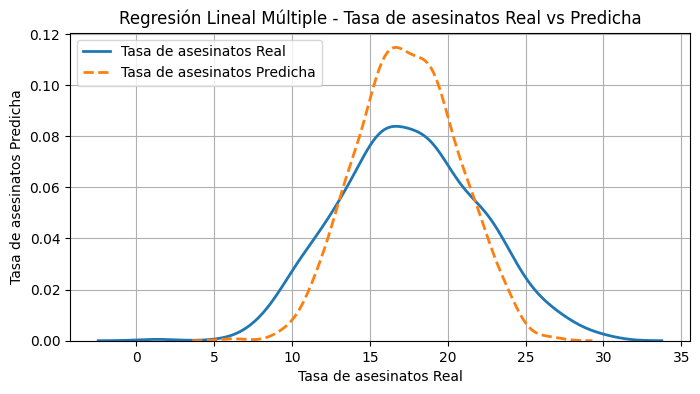

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Tasa de asesinatos Real', linewidth=2)
sns.kdeplot(y_pred, label='Tasa de asesinatos Predicha', linewidth=2, linestyle='--')
plt.xlabel("Tasa de asesinatos Real")
plt.ylabel("Tasa de asesinatos Predicha")
plt.title("Regresión Lineal Múltiple - Tasa de asesinatos Real vs Predicha")
plt.grid(True)
plt.legend()
plt.show()

### Utilizando el índice, la taza de desempleo, los ingresos medios y el porcentaje sin diploma de secundaria se encontró el mayor coeficiente de determinación(R2) con un 55%, cuando se utilizaron otros datos como la densidad poblacional, gasto policial e ingresos medios bajo un 10%.